<a href="https://colab.research.google.com/github/Agnes-FD/Agnes-FD/blob/main/Model_CNN40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
cd '/content/drive/MyDrive/New Masks Dataset'

/content/drive/MyDrive/New Masks Dataset


In [3]:
ls

Test/  Train/  Validation/


In [8]:
import os
path = '/content/drive/MyDrive/New Masks Dataset'
# Membuat Label pada gambar berdasarkan klasifikasi
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(path):
  for name in files:
    full_path.append(os.path.join(path, name))
    tag.append(path.split('/')[-1])
    file_name.append(name)

In [9]:
print(tag)

['Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask', 'Non Mask',

In [10]:
# Membuat dataframe berdasarkan hasil klasifikasi data yang sudah diberi label
import pandas as pd

df = pd.DataFrame({"path":full_path, "file_name": file_name, "tag":tag})
df.groupby(['tag']).size()

tag
Mask        513
Non Mask    512
dtype: int64

In [11]:
# cek data yang sudah diberi label
df

,path,file_name,tag
0,/content/drive/MyDrive/New Masks Dataset/Test/...,2086.jpg,Mask
1,/content/drive/MyDrive/New Masks Dataset/Test/...,2085.jpg,Mask
2,/content/drive/MyDrive/New Masks Dataset/Test/...,2072.jpg,Mask
3,/content/drive/MyDrive/New Masks Dataset/Test/...,2070.jpg,Mask
4,/content/drive/MyDrive/New Masks Dataset/Test/...,2083.jpg,Mask
...,...,...,...
1020,/content/drive/MyDrive/New Masks Dataset/Train...,32.jpg,Non Mask
1021,/content/drive/MyDrive/New Masks Dataset/Train...,6.jpg,Non Mask
1022,/content/drive/MyDrive/New Masks Dataset/Train...,336.jpg,Non Mask
1023,/content/drive/MyDrive/New Masks Dataset/Train...,288.jpg,Non Mask


In [12]:
# Membagi dataset menjadi dua bagian (train dan test)
from sklearn.model_selection import train_test_split

x = df['path']
y = df['tag']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size= 0.20, random_state=300)
x_test, x_val, y_test, y_val = train_test_split(
    x_test,y_test, test_size=0.5, random_state=100
)

In [13]:
# menyatukan kedalam masing-masing dataframe
df_test = pd.DataFrame({
    'path' : x_test,
    'tag' : y_test,
    'set' : 'test'
})

df_train = pd.DataFrame({
    'path' : x_train,
    'tag' : y_train,
    'set' : 'train'
})
df_val = pd.DataFrame({
    'path' : x_val,
    'tag' : y_val,
    'set' : 'validation'
})

In [14]:
print('train size', len(df_train))
print('test size', len(df_test))
print('validation size', len(df_val))

train size 820
test size 102
validation size 103


In [15]:
# melihat masing-masing dataset apakah sudah sesuai atau belum
df_all = df_train.append([df_test, df_val]).reset_index(drop=1)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

df_all.sample(4)


set         tag     
test        Mask         52
            Non Mask     50
train       Mask        415
            Non Mask    405
validation  Mask         46
            Non Mask     57
dtype: int64 




,path,tag,set
138,/content/drive/MyDrive/New Masks Dataset/Train...,Non Mask,train
254,/content/drive/MyDrive/New Masks Dataset/Train...,Mask,train
61,/content/drive/MyDrive/New Masks Dataset/Train...,Mask,train
69,/content/drive/MyDrive/New Masks Dataset/Valid...,Mask,train


In [24]:
# Memindahkan dataset
import shutil
from tqdm.notebook import tqdm as tq
datasource_path = '/content/drive/MyDrive/New Masks Dataset'
dataset_path = '/content/drive/MyDrive/newdataset'

In [25]:
for index, row in tq(df_all.iterrows()):
  file_path = row['path']

  if os.path.exists(file_path) == False:
   file_path = os.path.join(datasource_path, row['tag'], row['image'].split('.')[0])

  if os.path.exists(os.path.join(dataset_path, row['set'], row['tag'])) == False:
    os.makedirs(os.path.join(dataset_path, row['set'], row['tag']))
  
  destination_file_name = file_path.split('/')[-1]
  file_dest = os.path.join(dataset_path, row['set'], row['tag'], destination_file_name)

  if os.path.exists(file_dest) == False:
   shutil.copy2(file_path, file_dest)

In [26]:
# Define Directory
base_dir = '/content/drive/MyDrive/newdataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'validation')

In [35]:
#train test split
from sklearn.model_selection import train_test_split
train_without_mask_dir = os.path.join(train_dir, 'Non Mask')
train_with_mask_dir = os.path.join(train_dir, 'Mask')
test_without_mask_dir = os.path.join(test_dir, 'Non Mask')
test_with_mask_dir = os.path.join(test_dir, 'Mask')
val_without_mask_dir = os.path.join(val_dir, 'Non Mask')
val_with_mask_dir = os.path.join(val_dir, 'Mask')

In [36]:
os.listdir(val_dir)

['Non Mask', 'Mask']

In [37]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.4.1


In [38]:
#Image Augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)
val_generator = datagen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'binary'
)

Found 820 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [39]:
# Membuat Model CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_cnn = Sequential()
model_cnn.add(Conv2D(16,(3,3), activation= 'relu', padding= 'same', name='conv_1', input_shape=(256,256,3)))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_1'))
model_cnn.add(Conv2D(32,(3,3),activation='relu', padding='same', name='conv_2'))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_2'))
model_cnn.add(Conv2D(64,(3,3),activation='relu',padding='same', name='conv_3'))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_3'))
model_cnn.add(Conv2D(128,(3,3),activation='relu',padding='same' ,name='conv_4'))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_4'))
model_cnn.add(Conv2D(256,(3,3),activation='relu',padding='same', name='conv_5'))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_5'))

model_cnn.add(Flatten())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(32, activation='relu', name= 'dense_2'))
model_cnn.add(Dense(1, activation='sigmoid', name= 'output'))
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 128, 128, 16)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 128, 128, 32)      4640      
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 64, 64, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 64, 64, 64)        18496     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 32, 32, 64)        0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 32, 32, 128)      

In [40]:
print('Compiling Model.......')
model_cnn.compile (optimizer='Adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

Compiling Model.......


In [41]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print('Akurasi mencapai 97%, proses training dihentikan!')
      self.model.stop_training = True

callbacks = myCallback()

In [42]:
history_cnn = model_cnn.fit(
    train_generator,
    batch_size= 30,
    #steps_per_epoch = 20,
    epochs = 50,
    validation_data = test_generator,
    validation_steps = 20,
    callbacks = [callbacks]
)

Epoch 1/50
26/26 [==============================] - 84s 3s/step - loss: 0.6120 - accuracy: 0.6000 - val_loss: 0.5256 - val_accuracy: 0.7549
Epoch 2/50
26/26 [==============================] - 77s 3s/step - loss: 0.3437 - accuracy: 0.8616
Epoch 3/50
26/26 [==============================] - 77s 3s/step - loss: 0.2128 - accuracy: 0.9240
Epoch 4/50
26/26 [==============================] - 77s 3s/step - loss: 0.2577 - accuracy: 0.9070
Epoch 5/50
26/26 [==============================] - 77s 3s/step - loss: 0.1772 - accuracy: 0.9335
Epoch 6/50
26/26 [==============================] - 77s 3s/step - loss: 0.1453 - accuracy: 0.9519
Epoch 7/50
26/26 [==============================] - 77s 3s/step - loss: 0.1922 - accuracy: 0.9217
Epoch 8/50
26/26 [==============================] - 77s 3s/step - loss: 0.1880 - accuracy: 0.9386
Epoch 9/50
26/26 [==============================] - 76s 3s/step - loss: 0.1428 - accuracy: 0.9577
Epoch 10/50
26/26 [==============================] - 76s 3s/step - loss: 0.1

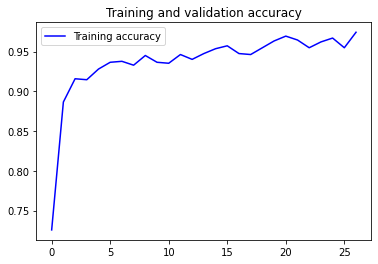

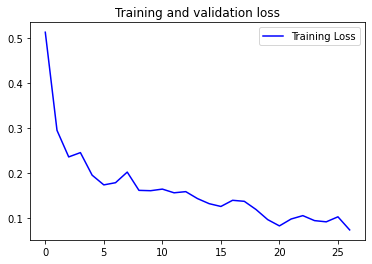

In [46]:
import matplotlib.pyplot as plt

acc = history_cnn.history['accuracy']
#val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
#val_loss = history_cnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'blue', label='Training accuracy')
#plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'blue', label='Training Loss')
#plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
cd'/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [48]:
#save model
import os

In [49]:
MODEL_BASE_PATH = "Model"
PROJECT_NAME ="CNN"
SAVE_MODEL_NAME = "Model_CNN40.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model_cnn.save(save_model_path,include_optimizer=False)

Saving Model At Model/CNN/Model_CNN40.h5...
